In [29]:
%load_ext autoreload
%autoreload 2
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from calcium_bflow_analysis.dff_analysis_and_plotting import plot_cells_and_traces
from calcium_bflow_analysis.sequencer import process_incoming_seq_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
folder = pathlib.Path('/data/Amit_QNAP/Calcium_FXS')
output_folder = (folder / 'sequencer_output')
fps = 58.21
downsampling_factor = 4
cell_radius = 8

In [40]:
datadict = process_incoming_seq_data.create_data_dictionary(folder)
fovnum = 2
example_fov_name = folder / 'x10' / 'FXS_609' / f'FXS_609_X10_FOV{fovnum}_mag3_20181009_0000{fovnum}.tif'
example_results_name = folder / 'x10' / 'FXS_609' / f'FXS_609_X10_FOV{fovnum}_mag3_20181009_0000{fovnum}_results.npz'

In [36]:
def plot_all_data_types(datadict, example_fov_name, example_results_name):
    """Plots and saves the data for the all data type, i.e. entries in the datadict
    returned from `create_data_dictionary`.
    The order of the figures:
    
    
    |----|---|
    |fov + traces                      |
    |row of images | heatmap original|
     | heatmap seq    | heatmap tsne 10| 
     | heatmap tsne 50|heatmap tsne 100 
    ||                |    
    """
    fig, ax = plt.subplots(4, 2, figsize=(24, 48))
    plot_cells_and_traces.show_side_by_side([example_fov_name], [example_results_name], cell_radius=cell_radius, ax=ax[0])
    plot_cells_and_traces.display_cell_excerpts_over_time(example_results_name, example_fov_name, cell_radius=cell_radius, number_of_channels=1, fps=fps, output_folder=output_folder)
    plot_cells_and_traces.display_heatmap(datadict['original'].data, ax=ax[1, 1], epoch='Original Dataset', downsample_factor=downsampling_factor, fps=fps)
    plot_cells_and_traces.display_heatmap(datadict['seq'].data, ax=ax[2, 0], epoch='Sequencer', downsample_factor=downsampling_factor, fps=fps)
    plot_cells_and_traces.display_heatmap(datadict['tsne_10'].data, ax=ax[2, 1], epoch='TSNE (p=10)', downsample_factor=downsampling_factor, fps=fps)
    plot_cells_and_traces.display_heatmap(datadict['tsne_50'].data, ax=ax[3, 0], epoch='TSNE (p=50)', downsample_factor=downsampling_factor, fps=fps)
    plot_cells_and_traces.display_heatmap(datadict['tsne_100'].data, ax=ax[3, 1], epoch='TSNE (p=100)', downsample_factor=downsampling_factor, fps=fps)
    return fig

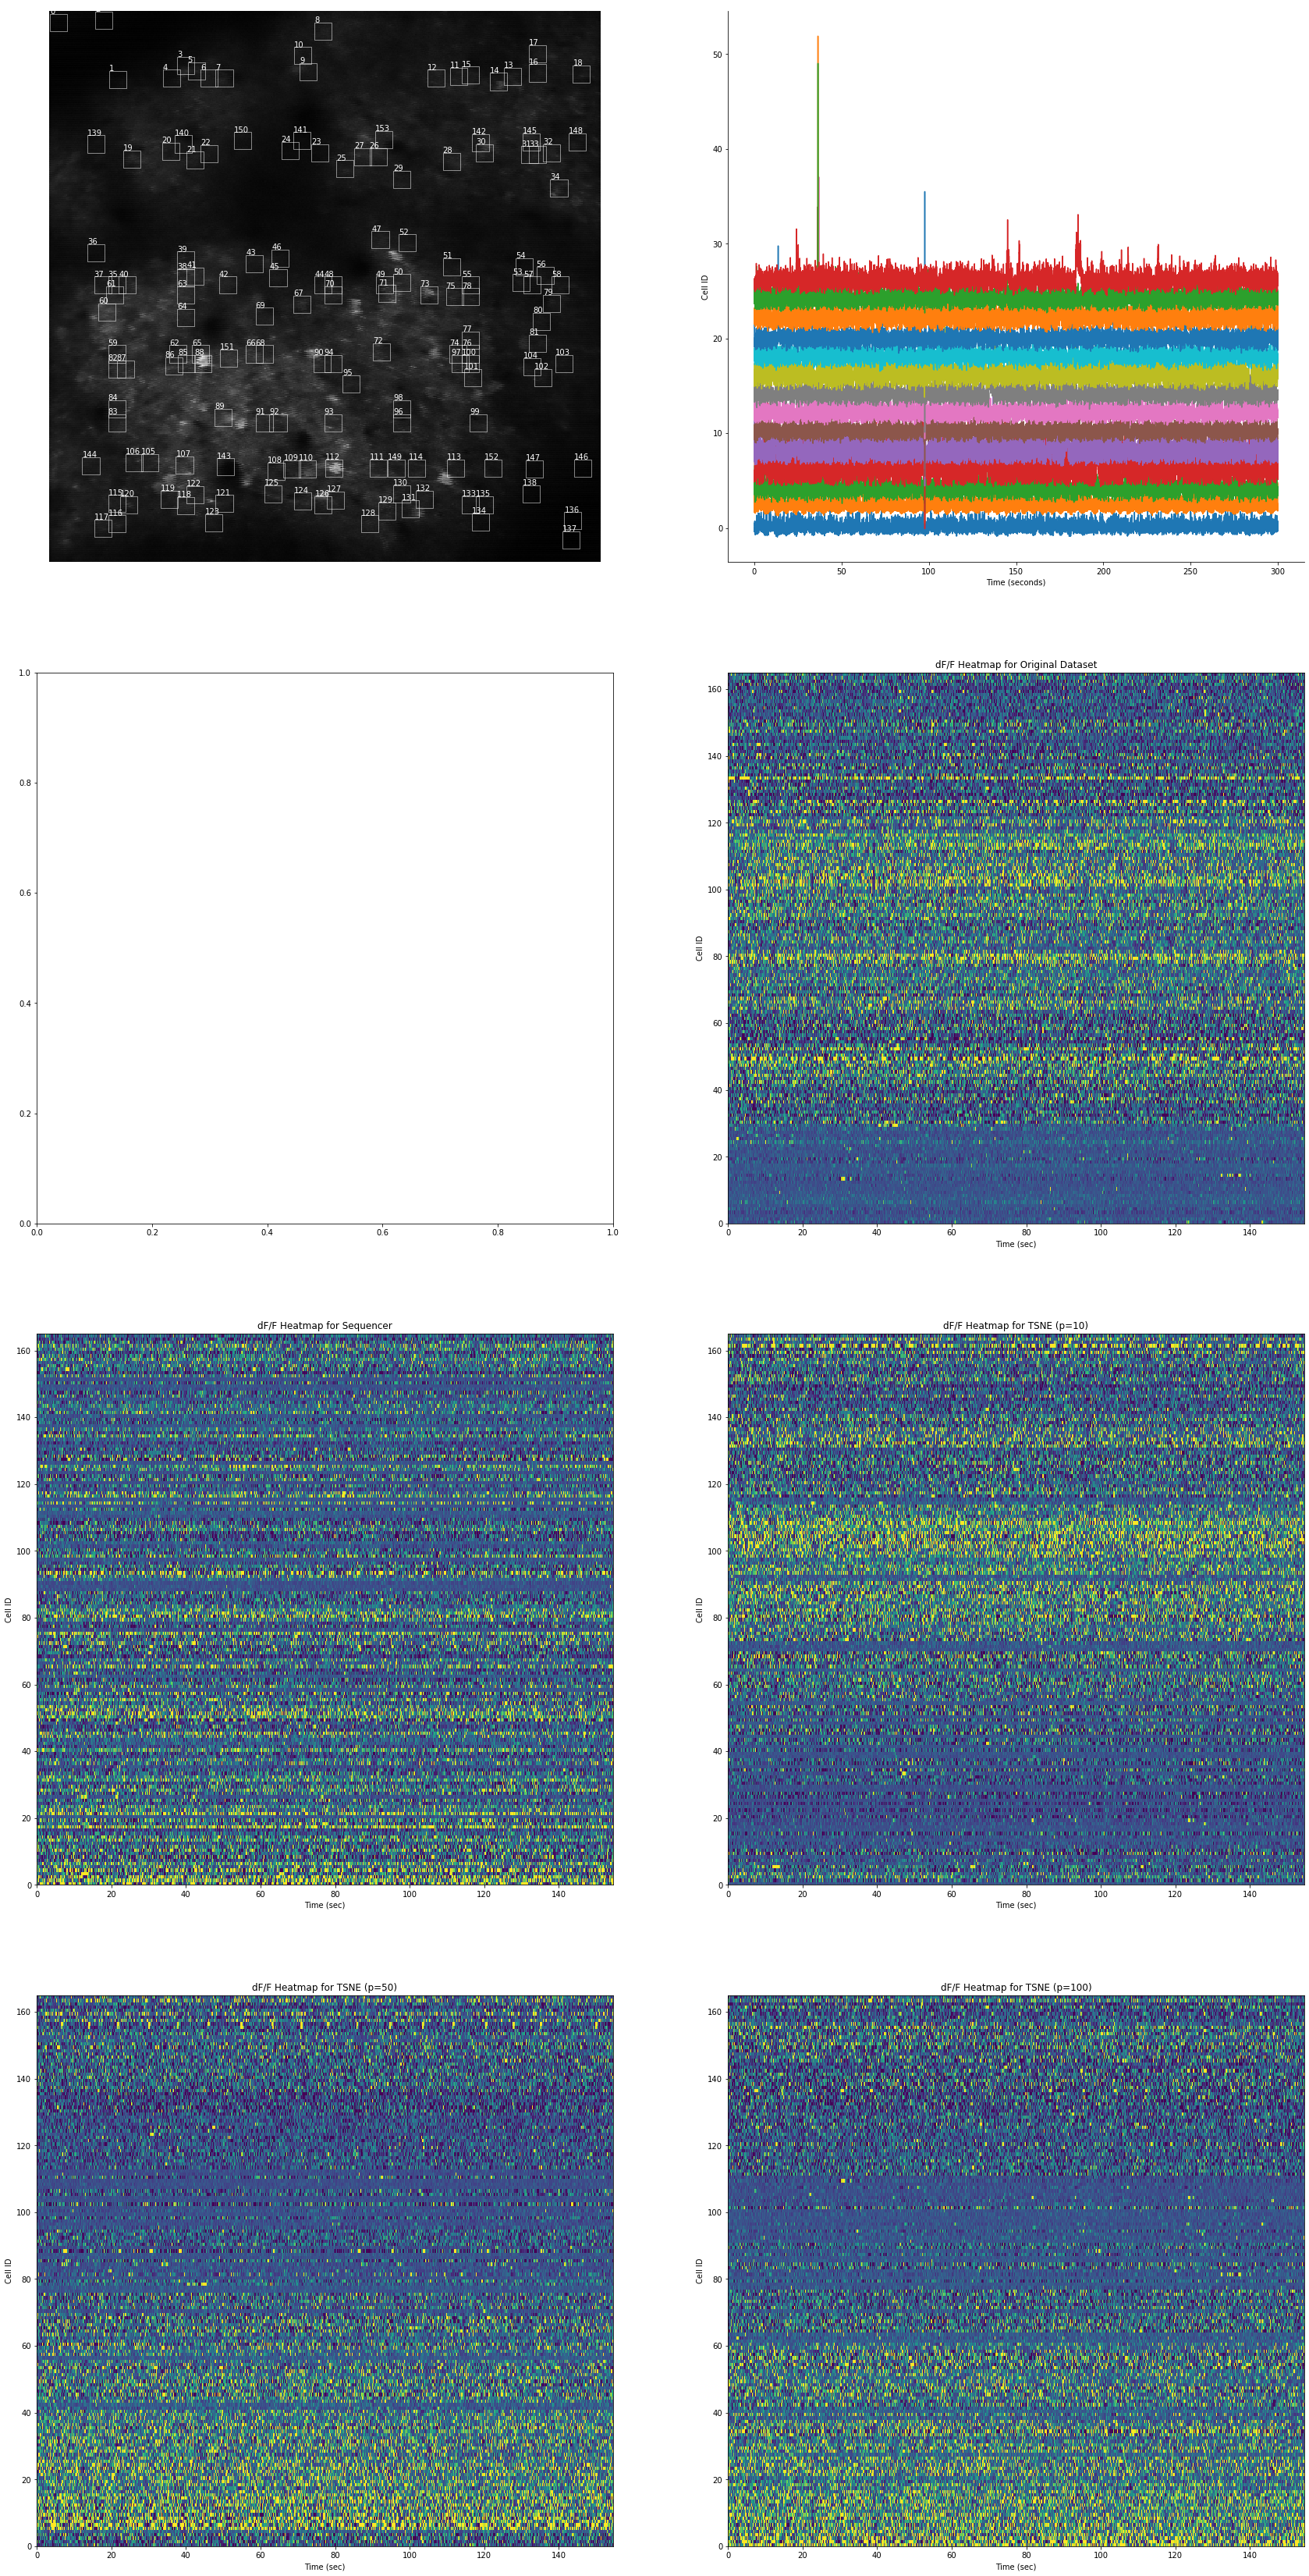

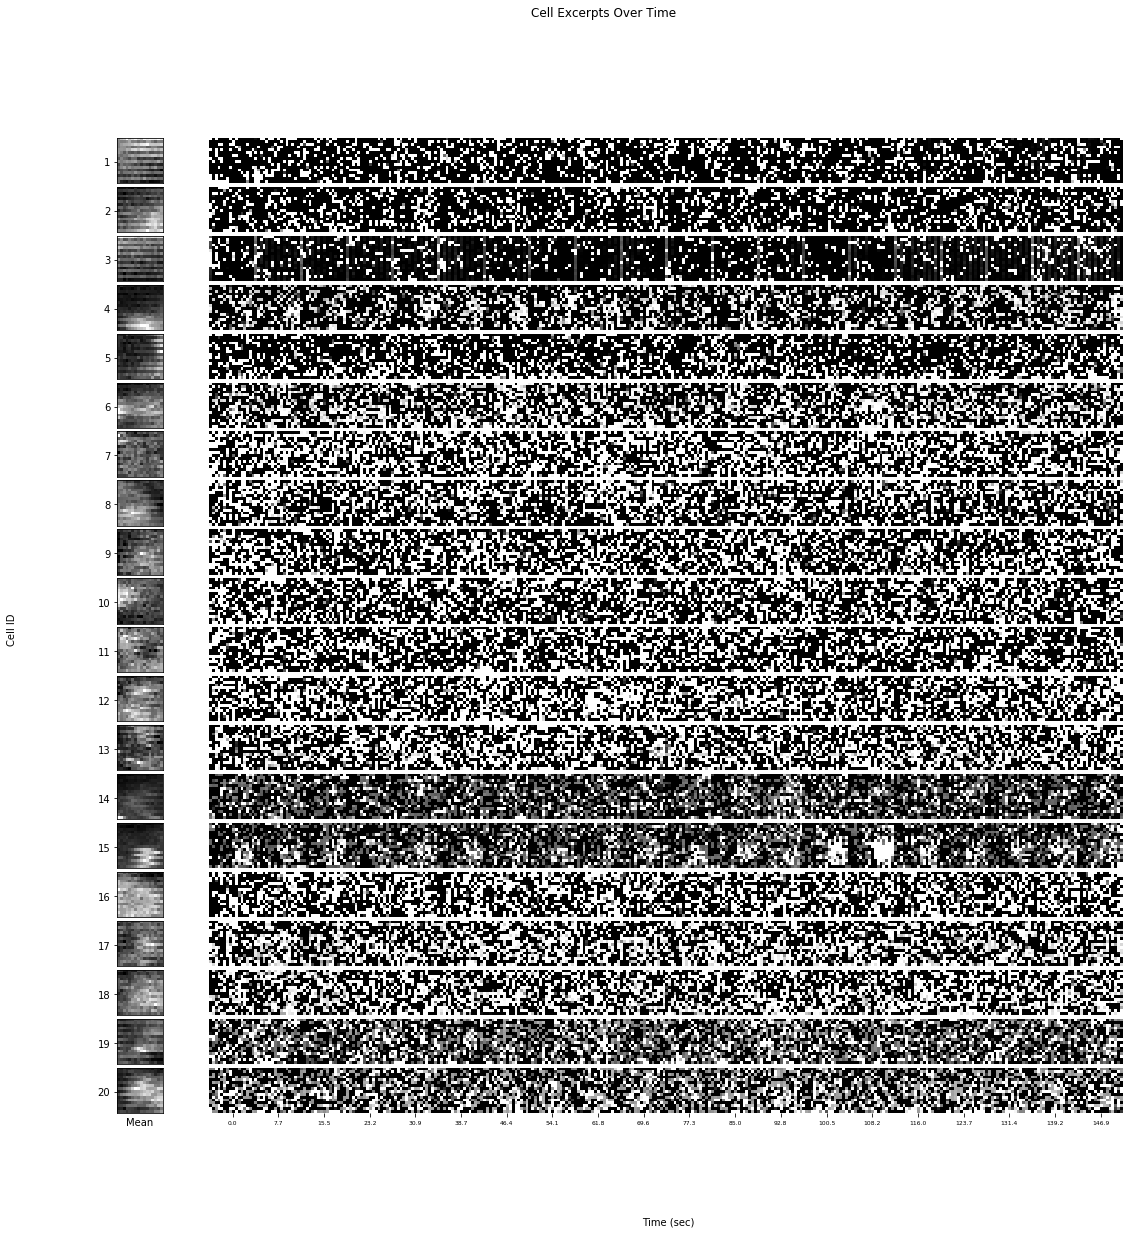

In [41]:
fig = plot_all_data_types(datadict, example_fov_name, example_results_name)

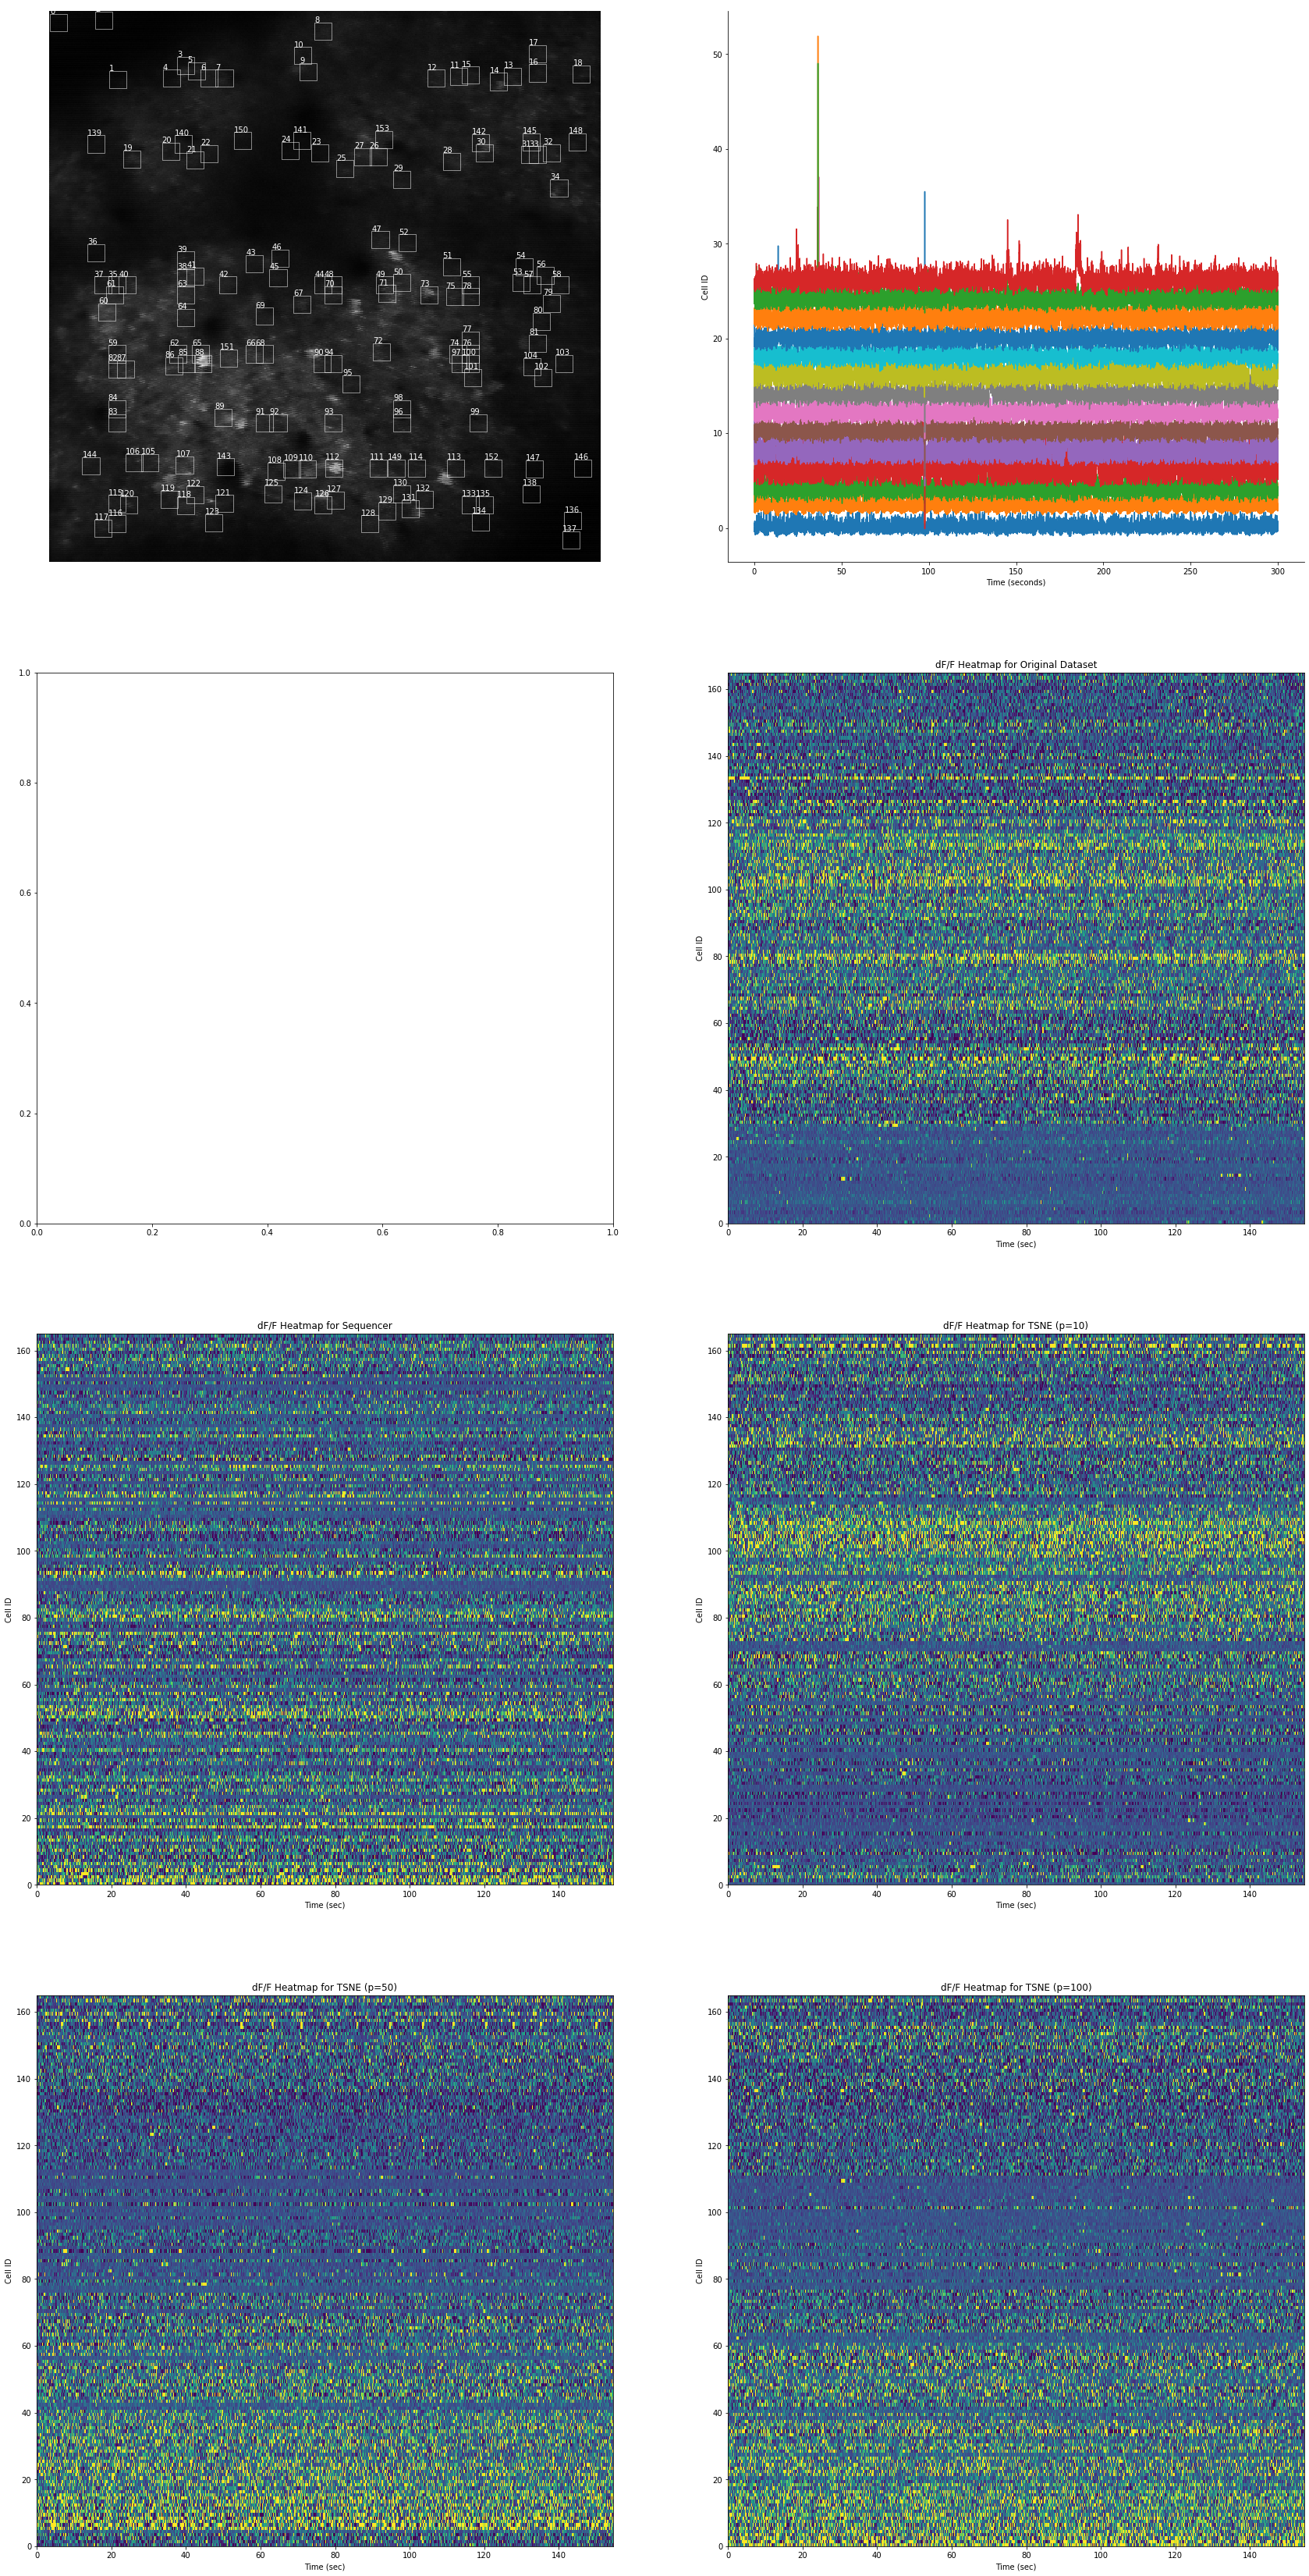

In [42]:
fig

In [43]:
fig.savefig(folder / 'sequencer_output' / 'trial.pdf', transparent=True, dpi=300)